### Reinforcement Learning - Resource Manager

Version 1.8:

- Changes to Environment
    - Add second Resource: Food
    - Use same Logic, see if the agent balances
        - Fun fact - he didn't
        - Implemented Balance reward based on a threshold
    - Implement Danger
- Make it possible to learn from given QTable



### Imports

In [6]:
import gym
import numpy as np
from gym.envs.registration import register
import matplotlib.pyplot as plt

### Environment

In [7]:
from environment.ResourceManagerEnvironment_v1_8 import ResourceManagerEnv
from agent.QLearning import QLearningAgent
from SaveQLearningResults import save_results

In [8]:
register(
    id='Resource-Manager-v1-8',
    entry_point='environment.ResourceManagerEnvironment_v1_8:ResourceManagerEnv',
    kwargs={
        'grid_size': 20,            #set to desired grid size
        'window_size': 300,         #set to desired window size
        'num_water_resources': 10,  #set to desired number of water resources
        'num_food_resources': 10,   #set to desired number of food resources
        'render_mode': 'rgb_array',      #set to desired render mode ('human' or 'rgb_array')
        'danger_mode': True,        #set to True to enable danger mode - spawn them lions!
        'max_episode_steps': 1000  #set to desired max episode steps
    },
)


c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\envs\registration.py:498: UserWarning: WARN: Overriding environment Resource-Manager-v1-8 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


## Training

In [9]:

env = gym.make('Resource-Manager-v1-8')

#Hyperparameters:

learning_rate=0.1
discount_factor=0.9
exploration_prob=1.0
epsilon_decay=0.995
replay_buffer_size=1000
batch_size=32

agent = QLearningAgent(env, learning_rate, discount_factor, exploration_prob, epsilon_decay)
num_episodes = 500

episode_rewards = []
episode_water_resources = []
episode_food_resources = []
episode_max_steps = []

for episode in range(num_episodes):
    observation = env.reset()
    total_reward = 0

    while True:
        #select action using the Q-learning agent
        action = agent.select_action(observation)
        #take a step in the environment
        next_observation, reward, done, _, _ = env.step(action)
        total_reward += reward

        #update the Q-table
        agent.update_q_table(observation, action, reward, next_observation)

        observation = next_observation

        #sample a batch from the replay buffer and update the Q-table
        if len(agent.replay_buffer) >= agent.batch_size:
                    # Sample a batch from the replay buffer and update Q-values
                    batch = agent.sample_from_replay_buffer()
                    for experience in batch:
                        state, action, reward, next_state = experience
                        agent.update_q_table(state, action, reward, next_state)

        if done:
            break

    episode_rewards.append(total_reward)
    episode_water_resources.append(env.water_resource)
    episode_food_resources.append(env.food_resource)
    episode_max_steps.append(env.num_step)

    print(f"Episode {episode + 1}, Total Steps: {env.num_step}, Total Reward: {total_reward}, Total Water Resource: {env.water_resource}, Total Food Resource: {env.food_resource}")

Lion ate the agent at [13 16]
Episode 1, Total Steps: 48, Total Reward: -508, Total Water Resource: 81.0, Total Food Resource: 76.0
Episode 2, Total Steps: 233, Total Reward: -4531, Total Water Resource: -0.5, Total Food Resource: 59.5
Episode 3, Total Steps: 211, Total Reward: -3055, Total Water Resource: -0.5, Total Food Resource: 84.5
Lion ate the agent at [ 8 13]
Episode 4, Total Steps: 36, Total Reward: -672, Total Water Resource: 82.0, Total Food Resource: 82.0
Episode 5, Total Steps: 205, Total Reward: -2885, Total Water Resource: -0.5, Total Food Resource: 99.5
Lion ate the agent at [13 16]
Episode 6, Total Steps: 64, Total Reward: -160, Total Water Resource: 68.0, Total Food Resource: 118.0
Lion ate the agent at [13 16]
Episode 7, Total Steps: 203, Total Reward: -2702, Total Water Resource: 0.0, Total Food Resource: 150.0
Lion ate the agent at [13 16]
Episode 8, Total Steps: 143, Total Reward: -1542, Total Water Resource: 35.0, Total Food Resource: 30.0
Lion ate the agent at [

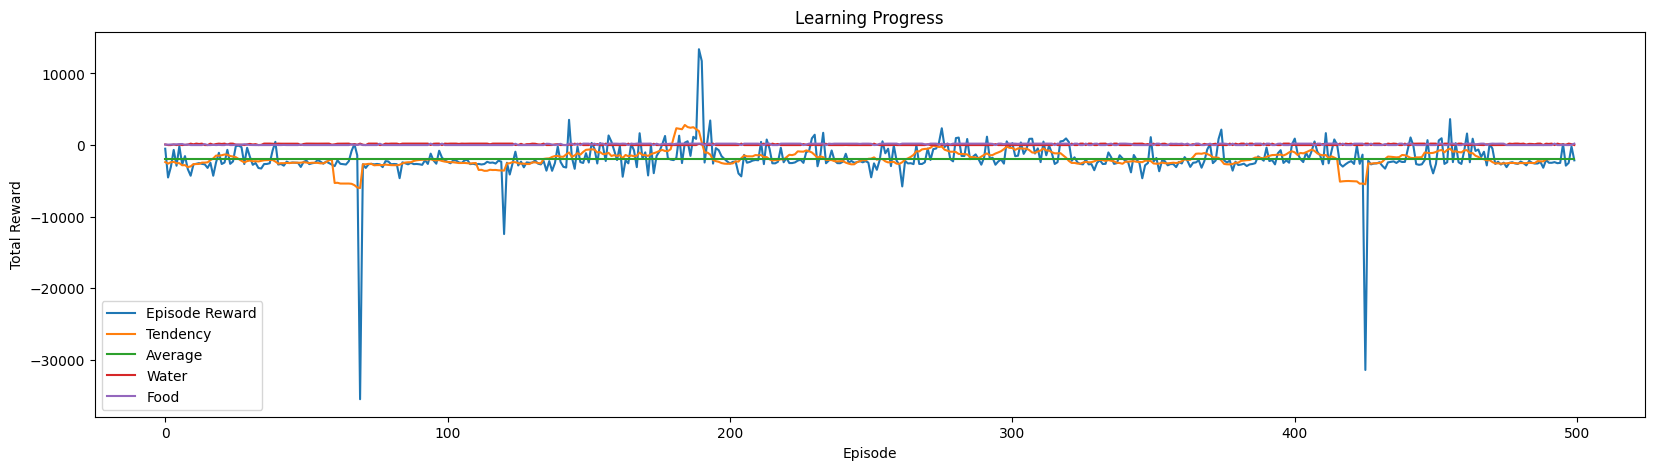

In [10]:
#Plot the total rewards
plt.figure(figsize=(20,5))
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Progress')
#plot tendency curve
plt.plot(np.convolve(episode_rewards, np.ones((10,))/10, mode='valid'))
#plot average
plt.plot(np.ones(len(episode_rewards))*np.mean(episode_rewards))
plt.plot(episode_water_resources)
plt.plot(episode_food_resources)
plt.legend(['Episode Reward', 'Tendency', 'Average', 'Water', 'Food'])
plt.show()


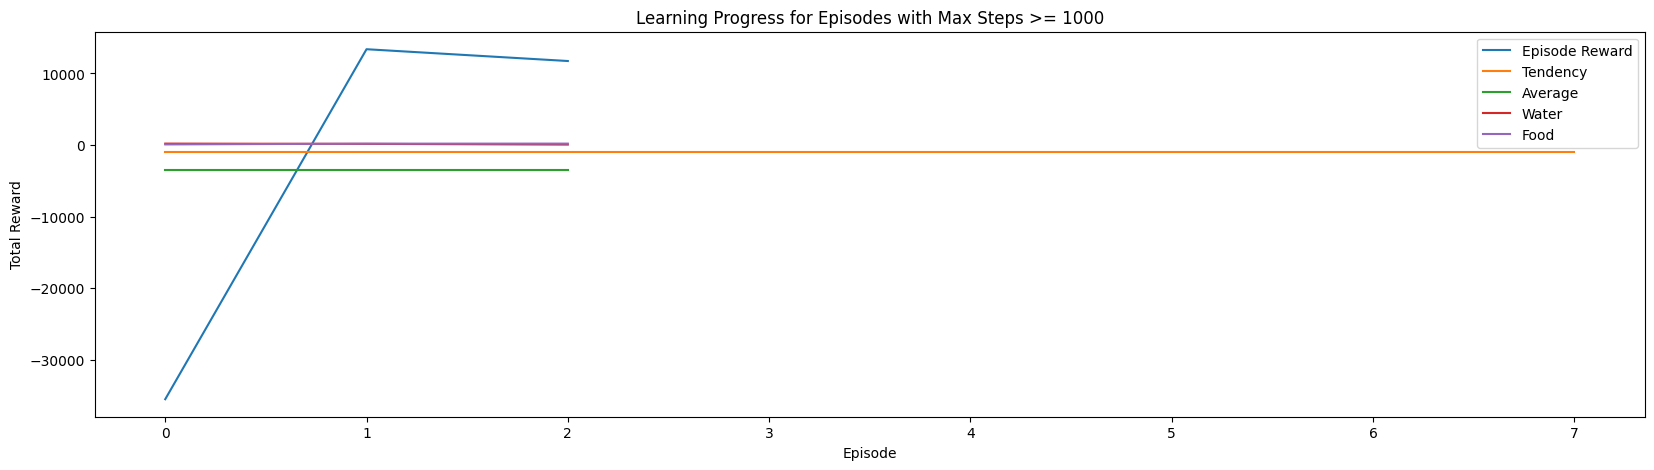

In [11]:
#filter episodes with max steps >= 1000
filtered_episodes = [(r, w, f, s) for r, w, f, s in zip(episode_rewards, episode_water_resources, episode_food_resources, episode_max_steps) if s >= 1000]

#unpack the filtered data
filtered_rewards, filtered_water_resources, filtered_food_resources, filtered_steps = zip(*filtered_episodes)

#plot the total rewards for filtered episodes
plt.figure(figsize=(20, 5))
plt.plot(filtered_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Progress for Episodes with Max Steps >= 1000')
plt.plot(np.convolve(filtered_rewards, np.ones((10,))/10, mode='valid'))
plt.plot(np.ones(len(filtered_rewards)) * np.mean(filtered_rewards))
plt.plot(filtered_water_resources)
plt.plot(filtered_food_resources)
plt.legend(['Episode Reward', 'Tendency', 'Average', 'Water', 'Food'])
plt.show()


Save Complete


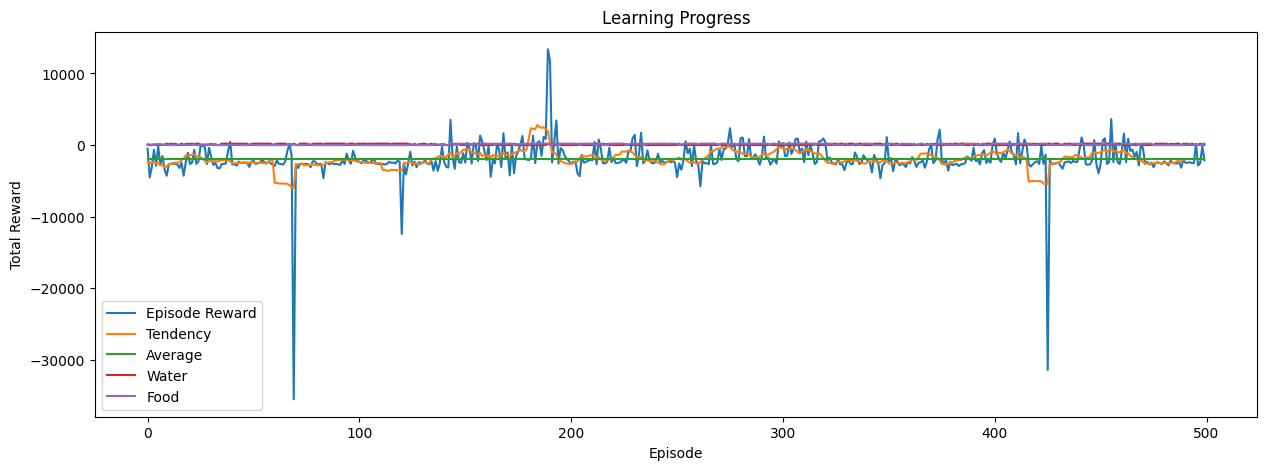

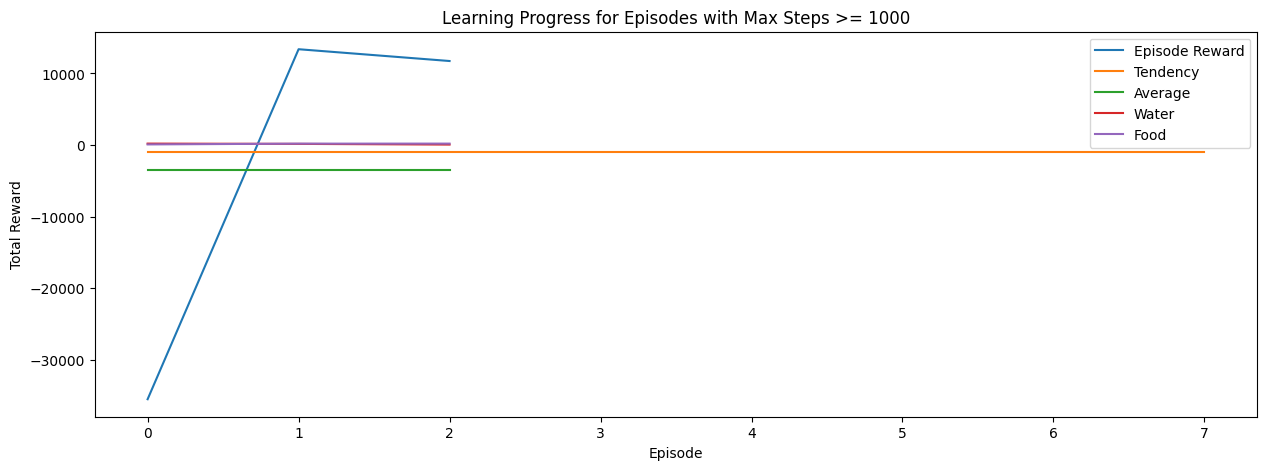

In [12]:
#Save results
save_results('FirstRunDangerMode', observation, agent.q_table, episode_rewards, episode_water_resources, episode_food_resources,
             episode_max_steps, learning_rate, discount_factor, exploration_prob, epsilon_decay, replay_buffer_size, batch_size)


## Continue Training with loaded Q-Table

In [ ]:

env = gym.make('Resource-Manager-v1-8')

#Hyperparameters:
#load the hyperparameters from the saved results
loaded_hyperparameters = np.genfromtxt('Results_10-12-2023_12-14-13_FirstRunDangerMode/Hyperparameters/hyperparameters.txt', dtype=None, delimiter='=', encoding=None)
hyperparameters = {}

#fill the hyperparameters dictionary
for key, value in loaded_hyperparameters:
    hyperparameters[key.strip()] = float(value)

learning_rate = hyperparameters['learning_rate']
discount_factor = hyperparameters['discount_factor']
exploration_prob = hyperparameters['exploration_prob']
epsilon_decay = hyperparameters['epsilon_decay']
replay_buffer_size = hyperparameters['replay_buffer_size']
batch_size = hyperparameters['batch_size']

loaded_q_table = np.loadtxt(f'Results_10-12-2023_12-14-13_FirstRunDangerMode/q_table.txt')

agent = QLearningAgent(env, learning_rate, discount_factor, exploration_prob, epsilon_decay, q_table=loaded_q_table)
num_episodes = 1

episode_rewards = []
episode_water_resources = []
episode_food_resources = []
episode_max_steps = []

for episode in range(num_episodes):
    observation = env.reset()
    total_reward = 0

    while True:
            #select action using the Q-learning agent
            action = agent.select_action(observation)
            # Take a step in the environment
            next_observation, reward, done, _, _ = env.step(action)
            total_reward += reward

            #update the Q-table
            agent.update_q_table(observation, action, reward, next_observation)

            observation = next_observation

            #sample a batch from the replay buffer and update the Q-table
            if len(agent.replay_buffer) >= agent.batch_size:
                        # Sample a batch from the replay buffer and update Q-values
                        batch = agent.sample_from_replay_buffer()
                        for experience in batch:
                            state, action, reward, next_state = experience
                            agent.update_q_table(state, action, reward, next_state)


            if done:
                break

    episode_rewards.append(total_reward)
    episode_water_resources.append(env.water_resource)
    episode_food_resources.append(env.food_resource)
    episode_max_steps.append(env.num_step)

    print(f"Episode {episode + 1}, Total Steps: {env.num_step}, Total Reward: {total_reward}, Total Water Resource: {env.water_resource}, Total Food Resource: {env.food_resource}")